<a href="https://colab.research.google.com/github/sanjida-tasnim/MACHINE-LEARNING/blob/main/Report_02_(classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Course no:** ETE 456

**course name:** Neural and Fuzzy systems in communications sessional

**Submitted to:** Eftekhar Hossain

**Submitted by:**

**name:** Mahabub-e-sanjida tasnim

**ID:** 1608009

**Level:** 4

**Term:** 2


# **Stroke Prediction Dataset**

Context According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

**Attribute Information**

id: unique identifier

gender: "Male", "Female" or "Other"

age: age of the patient

hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

ever_married: "No" or "Yes"

work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

Residence_type: "Rural" or "Urban"

avg_glucose_level: average glucose level in blood

bmi: body mass index

smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# **Task**

To accurately predict whether a patient is likely to get stroke or not.

**Objectives:**

1. To apply various classification algorithms on Stroke Prediction dataset.
2. To observe the accuracy of each algorithms.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

**To Import Libraries:**

In [ ]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt

**To Download The Data**

In [ ]:
# Download the data
!wget -O stroke-data.csv https://www.dropbox.com/s/zgburk3yces5tee/healthcare-dataset-stroke-data.csv?dl=0

--2021-12-20 03:57:30--  https://www.dropbox.com/s/zgburk3yces5tee/healthcare-dataset-stroke-data.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/zgburk3yces5tee/healthcare-dataset-stroke-data.csv [following]
--2021-12-20 03:57:31--  https://www.dropbox.com/s/raw/zgburk3yces5tee/healthcare-dataset-stroke-data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb7ea100f192e9b09c511d28c02.dl.dropboxusercontent.com/cd/0/inline/BcJr_Ac4ASU8JEcWMrP3ytePtI07vjMlOs1yt32VS_r0m9cMiMARaMR1ZMPJ2uzhU3jCQQiS_tSgAsgn4JOAF00ZO2CnFckLtLMAKT7NH3A3_gcvliIQmXd9TfzBxQ5CJKh5ovUGuJ4-fFZ7IvYcY8j4/file# [following]
--2021-12-20 03:57:31--  https://ucb7ea100f192e9b09c511d28c02.dl.dropboxusercontent.com/cd/0/inline/BcJr_Ac4ASU8JEcW

**To Import the Data**

In [ ]:
#importing the dataset

dataset_stroke_pred = pd.read_csv('stroke-data.csv')
dataset_stroke_pred

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
#To check the total numbers of rows and columns
dataset_stroke_pred.shape 
#The function "shape" returns the shape of an array.

(5110, 12)

In [ ]:
#To check the columns in dataset
dataset_stroke_pred.columns
#The function "columns" returns all the columns in the dataset 

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
#To split data into features and target
features = dataset_stroke_pred[['age'	,'hypertension',	'heart_disease', 'work_type', 'avg_glucose_level', 'bmi', 'smoking_status']]  # for independent
target = dataset_stroke_pred[['stroke']]   # for dependent
#Feature are those variable which are used for prediction and Target is the variable that we need to predict.

In [ ]:
#To show feature datas
features

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status
0,67.0,0,1,Private,228.69,36.6,formerly smoked
1,61.0,0,0,Self-employed,202.21,NaN,never smoked
2,80.0,0,1,Private,105.92,32.5,never smoked
3,49.0,0,0,Private,171.23,34.4,smokes
4,79.0,1,0,Self-employed,174.12,24.0,never smoked
...,...,...,...,...,...,...,...
5105,80.0,1,0,Private,83.75,NaN,never smoked
5106,81.0,0,0,Self-employed,125.20,40.0,never smoked
5107,35.0,0,0,Self-employed,82.99,30.6,never smoked
5108,51.0,0,0,Private,166.29,25.6,formerly smoked


In [ ]:
#To show target data
target

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


**To Check If There Is Any Missing Data**

In [ ]:
#To check missing data in age column
#To check if there is any NaN value in the column
pd.isnull(dataset_stroke_pred.age)

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Name: age, Length: 5110, dtype: bool

In [ ]:
#To check missing data in hypertension column
#To check if there is any NaN value in the column
pd.isnull(dataset_stroke_pred.hypertension)

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Name: hypertension, Length: 5110, dtype: bool

In [ ]:
#To check missing data in heart_disease column
#To check if there is any NaN value in the column
pd.isnull(dataset_stroke_pred.heart_disease)

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Name: heart_disease, Length: 5110, dtype: bool

In [ ]:
#To check missing data in work_type column
#To check if there is any NaN value in the column
pd.isnull(dataset_stroke_pred.work_type)

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Name: work_type, Length: 5110, dtype: bool

In [ ]:
#To check missing data in avg_glucose_level column
#To check if there is any NaN value in the column
pd.isnull(dataset_stroke_pred.avg_glucose_level)

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Name: avg_glucose_level, Length: 5110, dtype: bool

In [ ]:
#To check missing data in bmi column
#To check if there is any NaN value in the column
pd.isnull(dataset_stroke_pred.bmi)

0       False
1        True
2       False
3       False
4       False
        ...  
5105     True
5106    False
5107    False
5108    False
5109    False
Name: bmi, Length: 5110, dtype: bool

**BMI column has missing values. So, it is necessary to take care of the missing value, by replacing it with mean value.**

In [ ]:
#import Libraries
from sklearn.impute import SimpleImputer
#The SimpleImputer class provides basic strategies for imputing missing values.

In [ ]:
imputer = SimpleImputer(missing_values=np.nan,strategy = "mean") # imputer is an object of Imputer class 
imputer = imputer.fit(features[['bmi']]) 

In [ ]:
features[['bmi']]= imputer.transform(features[['bmi']])

**Here, fit function is used to find the mean values and transform function is used to replace the missing value with mean value.**

In [ ]:
#to show feature datas
features

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status
0,67.0,0,1,Private,228.69,36.600000,formerly smoked
1,61.0,0,0,Self-employed,202.21,28.893237,never smoked
2,80.0,0,1,Private,105.92,32.500000,never smoked
3,49.0,0,0,Private,171.23,34.400000,smokes
4,79.0,1,0,Self-employed,174.12,24.000000,never smoked
...,...,...,...,...,...,...,...
5105,80.0,1,0,Private,83.75,28.893237,never smoked
5106,81.0,0,0,Self-employed,125.20,40.000000,never smoked
5107,35.0,0,0,Self-employed,82.99,30.600000,never smoked
5108,51.0,0,0,Private,166.29,25.600000,formerly smoked


In [ ]:
#To check missing data in smoking_status column
#To check if there is any NaN value in the column
pd.isnull(dataset_stroke_pred.smoking_status)

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Name: smoking_status, Length: 5110, dtype: bool

In [ ]:
#To check missing data in stroke column
#To check if there is any NaN value in the column
pd.isnull(dataset_stroke_pred.stroke)

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Name: stroke, Length: 5110, dtype: bool

# **Encoding Categorical Data**

**Machine learning models require all input and output variables to be numeric. This means that if the dataset contains any categorical data, it must be encoded to numbers before a person can fit and evaluate a model.**

In [ ]:
#Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder

**Label Encoding converts categorical data into numerical data.**

In [ ]:
#Label Encoding
#Label Encoding of features
labelencoder_feature = LabelEncoder()
#the work_type,smoking_status column is represented by numeric value
features['work_type'] = labelencoder_feature.fit_transform(features['work_type'])
features['smoking_status'] = labelencoder_feature.fit_transform(features['smoking_status'])

In [ ]:
features

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status
0,67.0,0,1,2,228.69,36.600000,1
1,61.0,0,0,3,202.21,28.893237,2
2,80.0,0,1,2,105.92,32.500000,2
3,49.0,0,0,2,171.23,34.400000,3
4,79.0,1,0,3,174.12,24.000000,2
...,...,...,...,...,...,...,...
5105,80.0,1,0,2,83.75,28.893237,2
5106,81.0,0,0,3,125.20,40.000000,2
5107,35.0,0,0,3,82.99,30.600000,2
5108,51.0,0,0,2,166.29,25.600000,1


# **Splitting the dataset**


In [ ]:
# Machine learning libraries
from sklearn.model_selection import train_test_split
#The train-test split procedure is used to estimate the performance of machine learning algorithms. 

In [ ]:
#Spliting the Dataset into Training Set and Test Set

X_train,X_test,y_train,y_test=train_test_split(features,target,test_size = 0.2,random_state = 0)
# random_state = 0 is select to get the same result

In [ ]:
print(X_train.shape)
print(X_test.shape)

(4088, 7)
(1022, 7)


In [ ]:
X_train

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status
3029,36.0,0,0,2,67.29,36.7,1
2277,34.0,0,0,2,83.53,48.5,1
3002,60.0,0,0,2,65.16,30.8,2
246,75.0,0,0,3,78.80,29.3,1
2825,76.0,0,0,2,58.65,25.6,3
...,...,...,...,...,...,...,...
4931,53.0,1,0,0,98.61,38.8,3
3264,61.0,0,0,2,72.01,26.0,1
1653,44.0,0,0,2,94.71,28.4,3
2607,21.0,0,0,2,120.94,29.7,1


In [ ]:
X_test

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status
42,82.0,0,1,2,144.90,26.400000,3
380,4.0,0,0,4,106.22,16.700000,0
3524,58.0,0,0,2,79.95,25.900000,2
352,20.0,0,0,2,96.57,34.100000,2
4927,10.0,0,0,4,69.84,13.700000,0
...,...,...,...,...,...,...,...
472,43.0,0,0,2,75.05,22.900000,3
4446,42.0,0,0,2,191.94,27.900000,2
660,52.0,0,0,2,69.37,36.200000,0
57,78.0,0,0,2,237.75,28.893237,1


# **Feature Scaling**

**Feature scaling is a method used to normalize the range of independent variables or features of data.**

In [ ]:
#import Libraries
from sklearn.preprocessing import StandardScaler

In [ ]:
#feature Scaling
X_sc = StandardScaler()
X_train = X_sc.fit_transform(X_train)
X_test = X_sc.transform(X_test)

# **Logistic Regression**

In [ ]:
#import Library
from sklearn.linear_model import LogisticRegression

# Fitting Logistic Regression to the training dataset
lr = LogisticRegression()

lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# prediction
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

In [ ]:
# Making confusing matrix (actual,prediction)
confusion_matrix(y_test,y_pred)

array([[968,   0],
       [ 54,   0]])

**From the array, we can tell that there is 968 correct predictions and 54 incorrect predictions.**

In [ ]:
# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

              precision    recall  f1-score   support

          No       0.95      1.00      0.97       968
         Yes       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



**The accuracy is 95%** 

# **KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Classifier Model
classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[964   4]
 [ 54   0]]
              precision    recall  f1-score   support

          No       0.95      1.00      0.97       968
         Yes       0.00      0.00      0.00        54

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.94      0.92      1022



**From the array, we can tell that there is 964 correct predictions and 58 incorrect predictions.**

**The accuracy is 94%**

# **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

# Classifier Model
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[968   0]
 [ 54   0]]
              precision    recall  f1-score   support

          No       0.95      1.00      0.97       968
         Yes       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



**From the array, we can tell that there is 968 correct predictions and 54 incorrect predictions.**

**The algorithm gives 95% accuracy.**

# **Decision Tree classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Classifier Model
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[929  39]
 [ 46   8]]
              precision    recall  f1-score   support

          No       0.95      0.96      0.96       968
         Yes       0.17      0.15      0.16        54

    accuracy                           0.92      1022
   macro avg       0.56      0.55      0.56      1022
weighted avg       0.91      0.92      0.91      1022



**From the array, we can tell that there is 929 correct predictions and 85 incorrect predictions.**

**The accuracy is 92%**

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Classifier Model
classifier = RandomForestClassifier(n_estimators=10, criterion ='entropy', random_state = 0)
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[966   2]
 [ 53   1]]
              precision    recall  f1-score   support

          No       0.95      1.00      0.97       968
         Yes       0.33      0.02      0.04        54

    accuracy                           0.95      1022
   macro avg       0.64      0.51      0.50      1022
weighted avg       0.92      0.95      0.92      1022



**From the array, we can tell that there is 965 correct predictions and 55 incorrect predictions.**

**The accuracy is 95%**

# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Classifier Model
classifier = GaussianNB()
classifier.fit(X_train,y_train)
# Prediction
y_pred = classifier.predict(X_test)

In [ ]:
# Making confusing matrix
print(confusion_matrix(y_test,y_pred))

# Making confusing matrix
# it is used to check the accuracy of the classification
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

[[885  83]
 [ 33  21]]
              precision    recall  f1-score   support

          No       0.96      0.91      0.94       968
         Yes       0.20      0.39      0.27        54

    accuracy                           0.89      1022
   macro avg       0.58      0.65      0.60      1022
weighted avg       0.92      0.89      0.90      1022



**From the array, we can tell that there is 906 correct predictions and 116 incorrect predictions.**

**The accuracy is 89%.**

**In the above algorithms, naive bayes algorithm gives least accuracy. The highest accuracy is given by logistic regression, SVM and random forest.**

# **Klib**

In [ ]:
! pip install klib

In [ ]:
import klib

In [ ]:
klib.corr_mat(dataset_stroke_pred) # returns a color-encoded correlation matrix

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.00,0.00,0.00,-0.00,0.00,0.00,0.01
age,0.00,1.00,0.28,0.26,0.24,0.33,0.25
hypertension,0.00,0.28,1.00,0.11,0.17,0.17,0.13
heart_disease,-0.00,0.26,0.11,1.00,0.16,0.04,0.13
avg_glucose_level,0.00,0.24,0.17,0.16,1.00,0.18,0.13
bmi,0.00,0.33,0.17,0.04,0.18,1.00,0.04
stroke,0.01,0.25,0.13,0.13,0.13,0.04,1.00


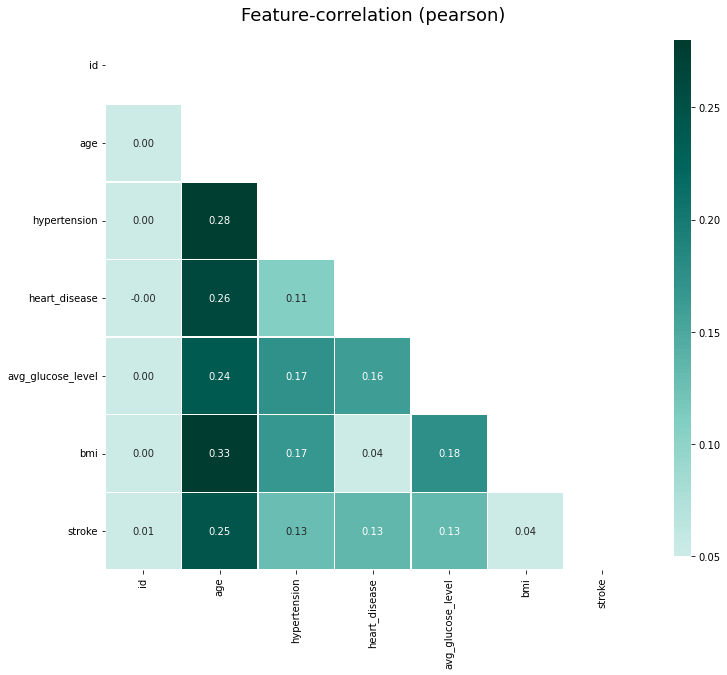

In [ ]:
klib.corr_plot(dataset_stroke_pred)